<a href="https://colab.research.google.com/github/KangHyeonGu1/-/blob/main/team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import scipy.stats as stats

In [34]:
data=pd.read_csv('teams.csv')
data.head()
rm = ols(' negtone~ dysfunc', data=data).fit()
rm.summary()
rm.params

Intercept    0.025682
dysfunc      0.619753
dtype: float64

In [35]:
ry = ols(' perform~ dysfunc + negtone', data=data).fit()
ry.summary()
ry.params

Intercept   -0.021764
dysfunc      0.441439
negtone     -0.534396
dtype: float64

In [36]:
ones=np.ones(shape=(60,3))
def dc(a,b):          
  c=a*b
  sum=c.sum()
  return sum

In [37]:
# 퍼지회구계수 추정을 위한 함수
def freg(data):
  df=data['dysfunc']
  xdf=pd.DataFrame({'a':df-0.05,'b':df,'c':df+0.05})
  x=xdf.to_numpy()
  net=data['negtone']
  mdf=pd.DataFrame({'a':net-0.05,'b':net,'c':net+0.05})
  m=mdf.to_numpy()
  per=data['perform']
  ydf=pd.DataFrame({'a':per-0.05,'b':per,'c':per+0.05})
  y=ydf.to_numpy()
  xtx=np.zeros(shape=(2,2))
  xlist=[ones,x]
  for i in range(0,2):    
    for j in range(0,2):
      xtx[i,j]= dc(xlist[i],xlist[j])
  xtm=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm[i,j]= dc(xlist[i],m)
  lxtx=np.linalg.inv(xtx)
  b=lxtx@xtm
  b=np.around(b, decimals=4)
  xtx2=np.zeros(shape=(3,3))
  xlist2=[ones,x,m]
  for i in range(0,3):    
    for j in range(0,3):
      xtx2[i,j]= dc(xlist2[i],xlist2[j])
  xty=np.zeros(shape=(3,1))
  for i in range(0,3):    
    for j in range(0,1):
      xty[i,j]= dc(xlist2[i],y)
  lxtx2=np.linalg.inv(xtx2)
  b2=lxtx2@xty
  b2=np.around(b2, decimals=4)
  b2 
  xtx3=np.zeros(shape=(2,2))
  xlist3=[ones,x]
  for i in range(0,2):    
    for j in range(0,2):
      xtx3[i,j]= dc(xlist3[i],xlist3[j])
  xty3=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xty3[i,j]= dc(xlist3[i],y)
  lxtx3=np.linalg.inv(xtx3)
  b3=lxtx3@xty3
  b3=np.around(b3, decimals=4)
  b3 
  return b, b2, b3


In [39]:
para=freg(data)
para

(array([[0.0255],
        [0.6244]]), array([[-0.0223],
        [ 0.4527],
        [-0.5313]]), array([[-0.0359],
        [ 0.121 ]]))

In [38]:
# sd 통계적 추론 
df=data['dysfunc']
xdf=pd.DataFrame({'a':df-0.05,'b':df,'c':df+0.05})
x=xdf.to_numpy()
net=data['negtone']
mdf=pd.DataFrame({'a':net-0.05,'b':net,'c':net+0.05})
m=mdf.to_numpy()
per=data['perform']
ydf=pd.DataFrame({'a':per-0.05,'b':per,'c':per+0.05})
y=ydf.to_numpy()

In [40]:
x_m=x.sum(axis=0)/60
x_m

array([-0.01533333,  0.03466667,  0.08466667])

In [41]:
#se
d2=(x-x_m)**2
sd=np.sqrt(d2.sum()/59)
sd
se=sd/np.sqrt(60)
se

0.08310547379090802

In [42]:
#seb
m_m=m.sum(axis=0)/60
m_m
d2b=(m-m_m)**2
sdb=np.sqrt(d2b.sum()/59)
sdb
seb=sdb/np.sqrt(60)
seb

0.11748212389563038

In [43]:
# seab
seab=np.sqrt((para[0][1]**2*seb**2)+ (para[1][2]**2*se**2) + (se**2*seb**2) )
seab

array([0.08617409])

In [44]:
# ab의 95% 신뢰구간과 z값 검정
ab=para[0][1]*para[1][2]
CI=[ab-1.96*seab,ab+1.96*seab]
z=ab/seab
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.50064493]), array([-0.16284251])] [0.00011827]


In [45]:
# c direct 의 95% 신뢰구간과 z값 검정
c_prime=para[1][1]
CI=[c_prime-1.96*se,c_prime+1.96*se]
z=c_prime/se
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([0.28981327]), array([0.61558673])] [5.11417149e-08]


In [46]:
# c total 의 95% 신뢰구간과 z값 검정
c=para[2][1]
CI=[c-1.96*se,c+1.96*se]
z=c/se
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.04188673]), array([0.28388673])] [0.14539784]


In [ ]:
#부트스트랩 표본
a_boot=[None]*5000
c_boot=[None]*5000
b_boot=[None]*5000
cprime_boot=[None]*5000
for i in range(0,5000):
  new_data=data.sample(n=60,replace=True)
  parameters=freg(new_data)
  a_boot[i]= parameters[0][1]
  c_boot[i]= parameters[2][1]
  b_boot[i]= parameters[1][2]
  cprime_boot[i]= parameters[1][1]

In [93]:
np.save('a_boot',a_boot)
np.save('b_boot',b_boot)
np.save('c_boot',c_boot)
np.save('cprime_boot',cprime_boot)

In [115]:
a_boot=np.load('a_boot.npy')
b_boot=np.load('b_boot.npy')
c_boot=np.load('c_boot.npy')
cprime_boot=np.load('cprime_boot.npy')
ab_boot=a_boot*b_boot

In [116]:
a_boot= a_boot.tolist()
b_boot= b_boot.tolist()
c_boot= c_boot.tolist()
cprime_boot= cprime_boot.tolist()
ab_boot= ab_boot.tolist()

In [117]:
a_boot.sort()
b_boot.sort()
c_boot.sort()
cprime_boot.sort()
ab_boot.sort()
a_boot=np.array(a_boot)
b_boot=np.array(b_boot)
c_boot=np.array(c_boot)
cprime_boot=np.array(cprime_boot)
ab_boot=np.array(ab_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


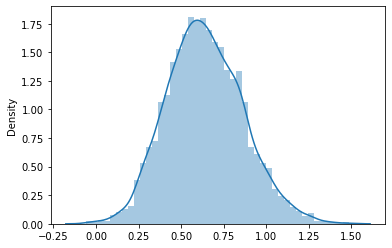

In [118]:
sns.distplot(a_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


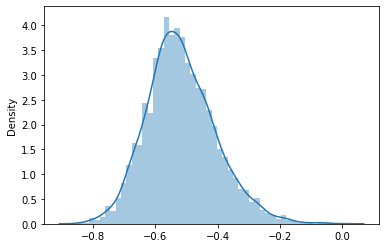

In [119]:
sns.distplot(b_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


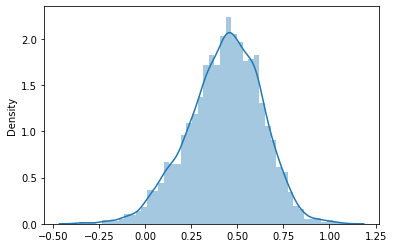

In [120]:
sns.distplot(cprime_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


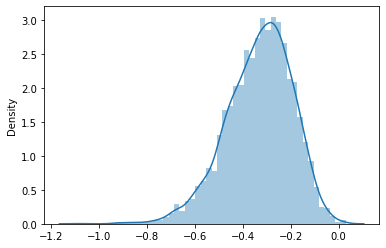

In [121]:
sns.distplot(ab_boot)

In [122]:
# a에 대한 부트스트랩 신뢰구간
a=para[0][1]
al=(a_boot[124]+ a_boot[125])/2
au=(a_boot[4873]+a_boot[4874])/2
acl=[a- al*se,a + au*se]
acl


[array([0.60432172]), array([0.71628141])]

In [123]:
# b에 대한 부트스트랩 신뢰구간
b_boot.sort()
b=para[1][2]
bl=np.abs((b_boot[124]+ b_boot[125])/2)
bu=np.abs((b_boot[4873]+b_boot[4874])/2)
bcl=[b- bl*seb,b + bu*seb]
bcl

[array([-0.61516461]), array([-0.49919214])]

In [124]:
# 간접효과 ab에 대한 부트스트랩 신뢰구간
ab_boot.sort()
ab= a*b
abl=np.abs((ab_boot[124]+ ab_boot[125])/2)
abu=np.abs((ab_boot[4873]+ab_boot[4874])/2)
abcl=[ab- abl*seb,ab + abu*seb]
abcl

[array([-0.4057423]), array([-0.31983928])]

In [131]:
# cprime에 대한 부트스트랩 신뢰구간
cprime_boot.sort()
cp=para[1][1]
cpl=np.abs((cprime_boot[124]+ cprime_boot[125])/2)
cpu=np.abs((cprime_boot[4873]+cprime_boot[4874])/2)
cpcl=[cp- cpl*se,cp + cpu*se]
cpcl

[array([0.45102127]), array([0.51770095])]

In [132]:
# c에 대한 부트스트랩 신뢰구간
c_boot.sort()
c=para[2][1]
cpl=np.abs((cprime_boot[124]+ cprime_boot[125])/2)
cpu=np.abs((cprime_boot[4873]+cprime_boot[4874])/2)
cpcl=[cp- cpl*se,cp + cpu*se]
cpcl

[array([0.45102127]), array([0.51770095])]